In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# 군집화
- Y가 없는 자료
- 주어진 X만 가지고 자료를 특성 별로 묶어줌

- semi-supervised (준지도)
 - 지도학습이 사용되기 어려운 경우
 - 자료 수집이 어렵거나, 레이블링을 직접 해야 하는 경우
 - 이런 경우 군집화를 통해 레이블링을 진행
- 군집화는 거리, 분포, 밀도를 기반으로 자료 분류

In [ ]:
faithful=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/데이터 사이언스/data/clustering/faithful.csv')
faithful.head() # 분출지속시간, 분출 간 간격

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


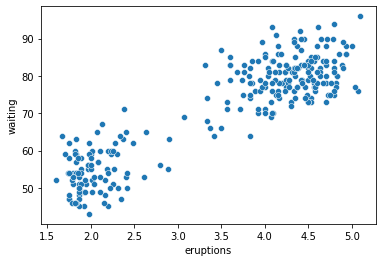

In [ ]:
sns.scatterplot( faithful.eruptions, faithful.waiting )
# 분출 지속 시간이 길수록 분출 간 간격이 넓어짐
# 두 그룹으로 나눠질 수 있음

## K-Means Clustering
- 거리 기반
 - 자료 사이 거리가 가까우면 같은 특징을 가질 것으로 가정
- 군집의 개수는 미리 알고 있어야 함
 - 이 예시에서는 군집 2개
1. 초기 중심점을 아무 곳에 찍기
2. 모든 자료에서 중심점과 자료 간의 거리 계산
3. 클래스의 평균점을 구합니다.(해당 클래스의 새로운 중심점)
4. 새로운 중심점을 기준으로 2번의 과정으로 돌아가 반복
5. 지정된 횟수 또는 중심점이 더 이상 움직이지 않을때까지 반복

1. 초기 중심점 찍기

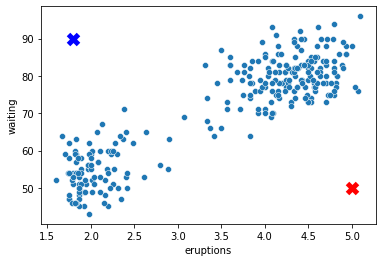

In [ ]:
centroid = np.array([
  [1.8, 90],
  [5.0, 50]
])

sns.scatterplot( faithful.eruptions, faithful.waiting )
plt.plot( centroid[0, 0], centroid[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( centroid[1, 0], centroid[1, 1], 'rx', markersize=10, markeredgewidth=5)

2. 모든 자료에서 중심점과 자료 간의 거리 계산
- 거리 가까운 쪽으로 클래스 할당

In [ ]:
faith = faithful.to_numpy()

In [ ]:
# 군집의 갯수
k = 2

# 클래스
cls = np.zeros( (faith.shape[0], k) )
cls[:5]

# 중심점과의 거리를 계산
for n in range( faith.shape[0] ):
  x = faith[n]

  # 거리는 l1 norm을 이용해서 계산
  dist1 = np.linalg.norm( x - centroid[0] ) # 파란점과의 거리
  dist2 = np.linalg.norm( x - centroid[1] ) # 빨간점과의 거리

  # 둘 중에 더 가까운 쪽으로 클래스를 분류
  if dist1 < dist2: cls[n, 0] = 1
  else: cls[n, 1] = 1
cls[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

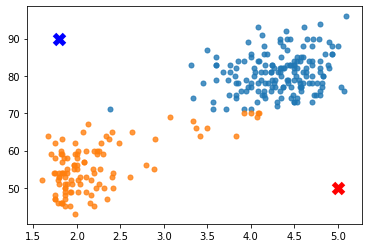

In [ ]:
blue = faith[np.where(cls[:,0] == 1)]
red = faith[np.where(cls[:,1] == 1)]

plt.plot( blue[:,0], blue[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( red[:,0], red[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( centroid[0, 0], centroid[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( centroid[1, 0], centroid[1, 1], 'rx', markersize=10, markeredgewidth=5)

3. 각 클래스에서 평균 구하고 중심점 업데이트

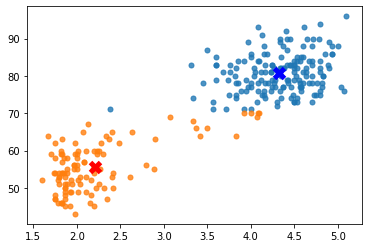

In [ ]:
centroid[0] = blue.mean(axis=0)
centroid[1] = red.mean(axis=0)

plt.plot( blue[:,0], blue[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( red[:,0], red[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( centroid[0, 0], centroid[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( centroid[1, 0], centroid[1, 1], 'rx', markersize=10, markeredgewidth=5)

4. 중심점이 이동하지 않았거나, 정해진 횟수를 완료하면 종료

라이브러리 사용

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2).fit(faith)

In [ ]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

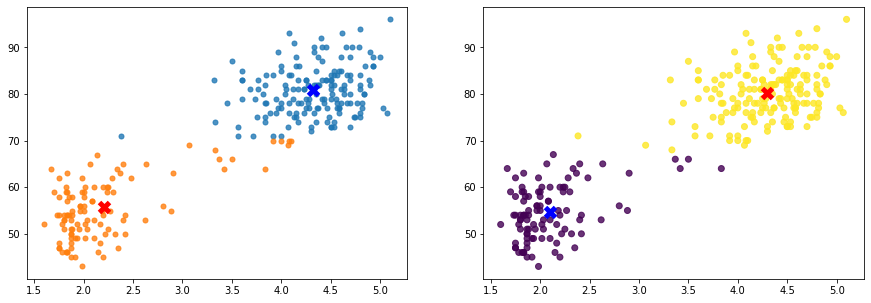

In [ ]:
plt.figure( figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot( blue[:,0], blue[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( red[:,0], red[:,1], 'o', markersize=5, alpha=0.8)
plt.plot( centroid[0, 0], centroid[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( centroid[1, 0], centroid[1, 1], 'rx', markersize=10, markeredgewidth=5)

plt.subplot(1, 2, 2)
plt.scatter( faithful.eruptions, faithful.waiting, c=kmeans.labels_, alpha=0.8)
plt.plot( kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'rx', markersize=10, markeredgewidth=5)

## GMM
- 자료가 k개의 정규분포로부터 생성되었다고 가정하는 모델
 - 전체가 하나의 분포가 아닌 
 - 하위 분포가 존재할 것이라고 가정
 - k 개수 알고 있어야 함

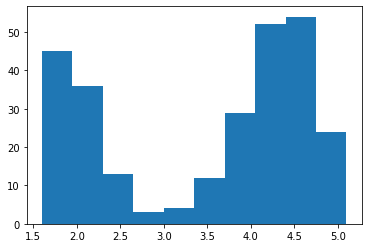

In [ ]:
plt.hist(faithful.eruptions)
plt.show()
# 쌍봉으로 이뤄짐 -> 정규분포가 두개 이상이 존재할 것이라 가정

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm= GaussianMixture( n_components=2).fit(faithful)

In [ ]:
gm_labels=gm.predict(faithful)
gm_labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

 k-means와 비교

Text(0.5, 1.0, 'GMM')

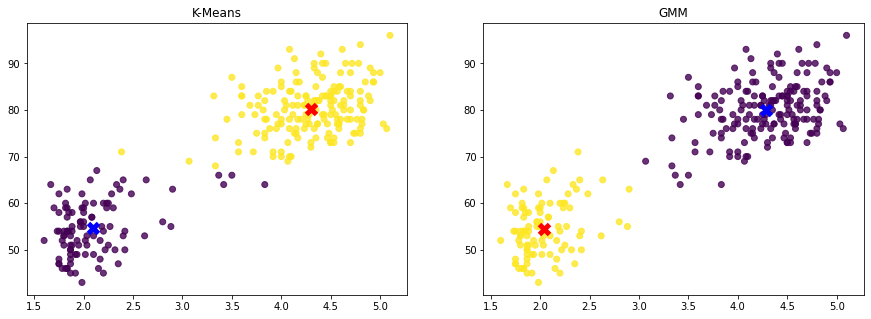

In [ ]:
plt.figure( figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter( faithful.eruptions, faithful.waiting, c=kmeans.labels_, alpha=0.8)
plt.plot( kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('K-Means')

plt.subplot(1, 2, 2)
plt.scatter( faithful.eruptions, faithful.waiting, c=gm_labels, alpha=0.8)
plt.plot( gm.means_[0, 0], gm.means_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( gm.means_[1, 0], gm.means_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('GMM')

# K?
- K-Means나 GMM 모두 K를 미리 알고 있어야 함
- K 추정 방법

## 엘보우 메소드
- K-Means에서는 군집 간 거리의 합을 나타내는 inertia 미리 계산함
- 급격히 변하는 구간이 옐로우 구간. 이를 군집의 개수로 판단

In [ ]:
dist=[]
for k in range(1,11):
  model=KMeans(n_clusters=k).fit(faithful)
  dist.append(model.inertia_)

In [ ]:
dist

[50440.15702526101,
 8901.768720947211,
 5188.540468232617,
 2941.7209033137615,
 2048.8253573997567,
 1470.6096639968077,
 1016.5730842795673,
 797.2853036419394,
 651.0994565063347,
 531.4037846247273]

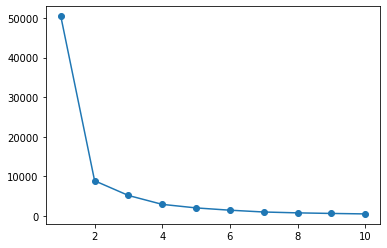

In [ ]:
plt.plot(range(1,11), dist,'-o')
# 확 꺾이는 부분(x=2)이 엘보우 구간

## KElbowVisualizer
- 엘보우 메소드와 동일
- 모델 훈련과 동시에 훈련 시간 표시

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 24.5 MB/s 
     |████████████████████████████████| 14.8 MB 500 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

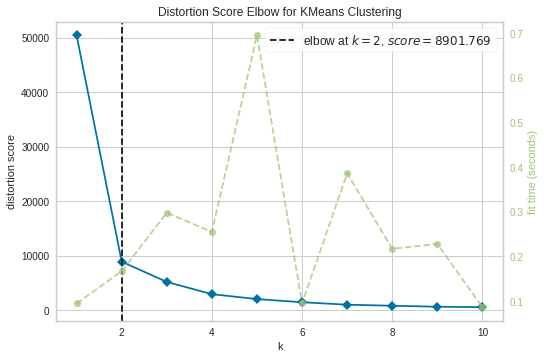

In [ ]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11) )
visualizer.fit(faithful)
visualizer.poof()

## Kneed
- 무릎 찾기~
- 그래프 안그려도 k 찾아줌
- 잘 안씀

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
dist = []
for k in range(1, 11):
  model = KMeans(n_clusters=k).fit(faithful)
  dist.append( model.inertia_ )

In [ ]:
result = KneeLocator(x=range(1, 11), y=dist, curve='convex', direction='decreasing')

In [ ]:
print( f'best k is: {result.elbow}')

best k is: 2


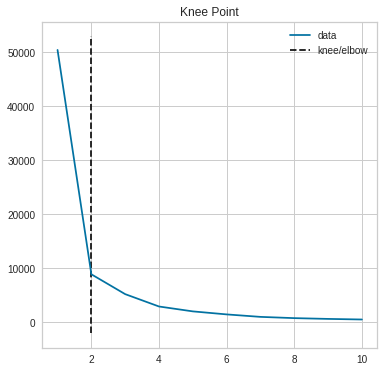

In [ ]:
result.plot_knee()

## Silhouette method
- 각 군집 내의 거리 + 군집 간의 거리 모두 찾아줌

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
scores = []

# 군집간의 거리를 계산을 하게 되는데
# 최소 군집의 갯수는 2개 이상이 되어야 합니다.
for k in range(2, 11):
  model = KMeans(n_clusters=k).fit(faithful)
  labels = model.predict(faithful)
  sc = silhouette_score( faithful.to_numpy(), labels, metric='euclidean', sample_size=None)
  scores.append(sc)

In [ ]:
scores

[0.724054851995858,
 0.583617622775959,
 0.553916636789305,
 0.5442763339959664,
 0.5238993071892042,
 0.5448948622343485,
 0.5405469946093541,
 0.5227947542020644,
 0.5288442264931453]

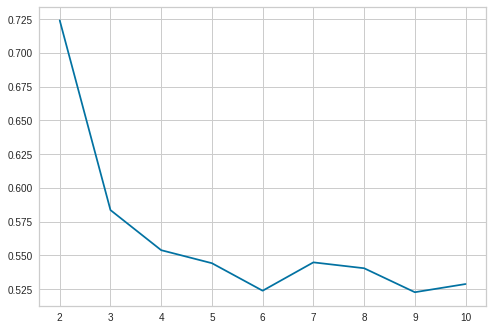

In [ ]:
plt.plot( range(2, 11), scores)

Silhouette Visualizer
- 실루엣의 점수만 보지 않고, 그래프를 통해서 각 군집의 분포를 확인
- 분포가 균등하게 되어 있으면 좋은건가?
  - 해석하기 나름(데이터의 분석은 분석가의 주관이 개입될 수 밖에 없다)
  - 결과적으로 종합적인 판단을 하기 위한 여러 형태의 그림을 확인

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

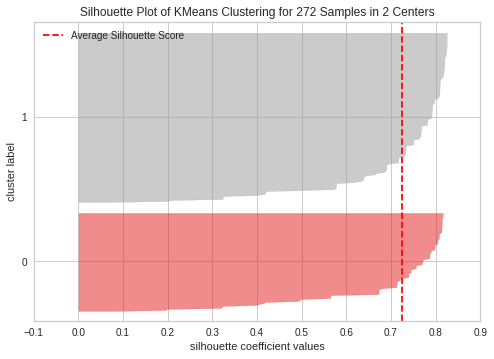

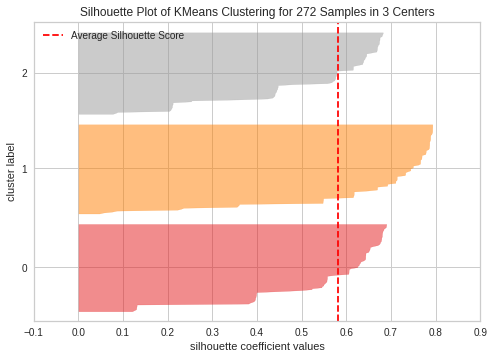

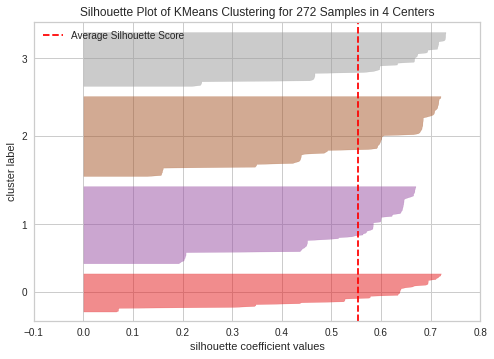

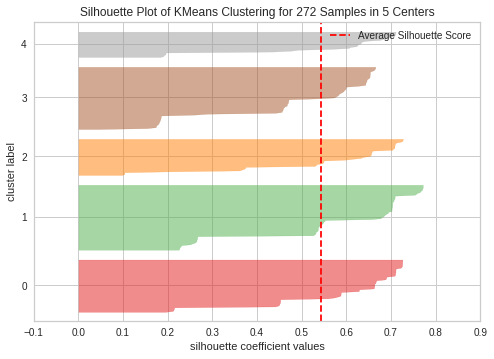

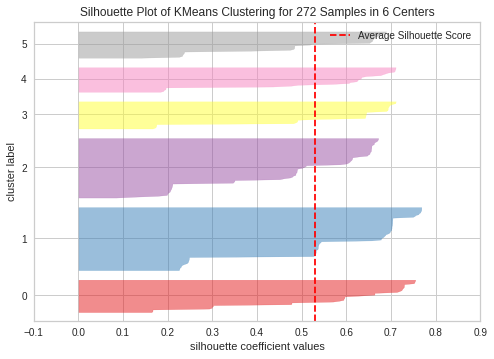

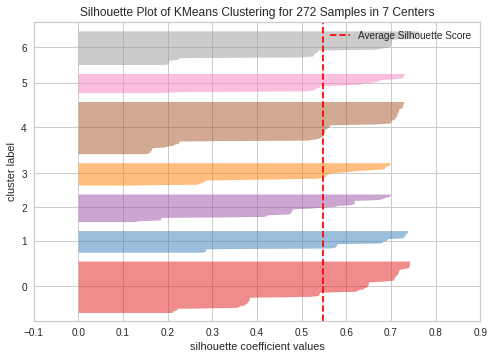

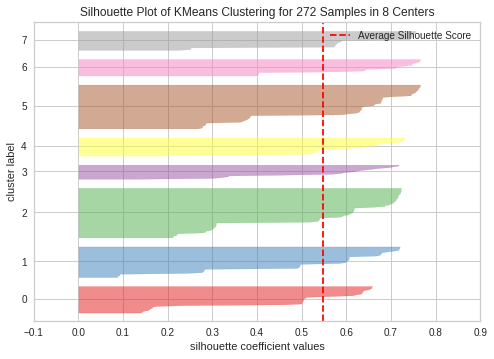

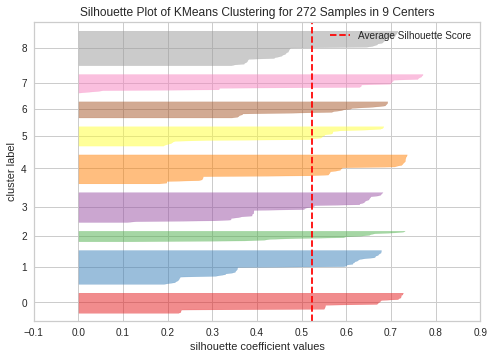

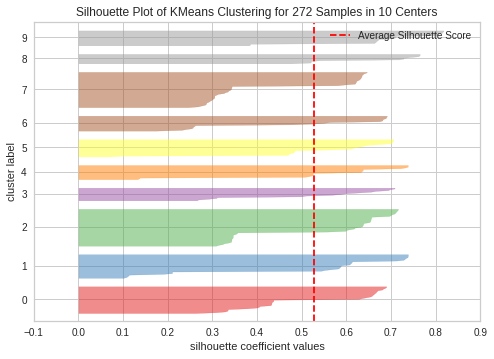

In [ ]:
for k in range(2, 11):
  model = KMeans(n_clusters=k)
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(faithful)
  visualizer.poof()

## DBSCAN
- Density-Based Spatial Clustering of Application with Noise
- 밀도를 기반으로 하는 클러스터링
- K를 몰라도 됩니다.
  - 군집의 개수를 미리 알고 있지 않아도 됩니다.


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN( eps=2, min_samples=3).fit(faithful)
db_labels = dbscan.fit_predict(faithful)

In [ ]:
db_labels

array([ 0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1, -1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  0

In [ ]:
sns.reset_orig()

Text(0.5, 1.0, 'DBSCAN')

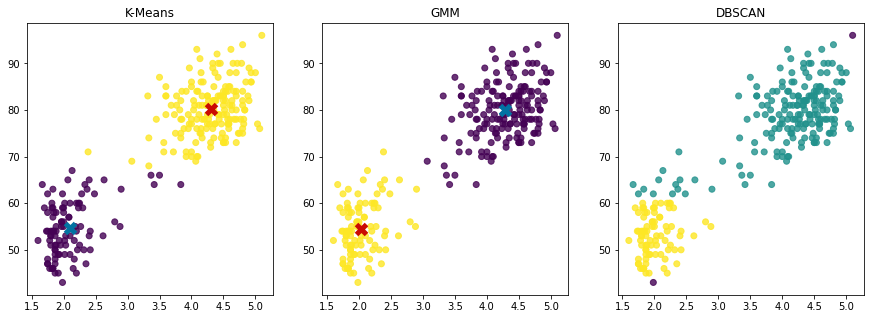

In [ ]:
plt.figure( figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter( faithful.eruptions, faithful.waiting, c=kmeans.labels_, alpha=0.8)
plt.plot( kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('K-Means')

plt.subplot(1, 3, 2)
plt.scatter( faithful.eruptions, faithful.waiting, c=gm_labels, alpha=0.8)
plt.plot( gm.means_[0, 0], gm.means_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( gm.means_[1, 0], gm.means_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('GMM')

plt.subplot(1, 3, 3)
plt.scatter( faithful.eruptions, faithful.waiting, c=db_labels, alpha=0.8 )
plt.title('DBSCAN')

## Agglomerative
- 계층적 군집화
  - K-Means의 단점을 보완한 방법
    - 노이즈(이상치)에 민감함
    - 초기에 주어지는 중심점의 위치에 따라서 결과가 달라진다.
    - k를 미리 알고 있어야 한다.
  - Agglomerative
    - K를 정하지 않아도 사용할 수 있다.
    - 초기 중심점을 사용하지 않기 때문에, 항상 동일한 결과
    - 시각화가 가능(어떻게 군집이 생성됐는지도 확인)
  - 가장 큰 단점은
    - 느려요
    - 자료가 아주 많은 경우에는 사용이 어렵다(계산 시간이 오래 걸림)
    - 샘플만 추출해서 전체적인 군집의 분포를 확인하는 용도로 사용이 가능

In [ ]:
from sklearn.cluster import AgglomerativeClustering

- 파라미터
1. linkage: 가장 비슷한 클러스터를 측정하는 방법
  - 'ward', 'complete', 'average', 'single'
  - ward(기본값): 군집내의 분산을 가장 작게 하는 군집을 하나로 합치는 방법
  - complete: 군집들간의 거리가 가장 짧은 두 군집을 하나로 합치는 방법
  - average: 군집들 사이의 평균 거리가 가장 짧은 두 군집을 하나로 합치는 방법

- linkage가 ward이면 affinity는 euclidean만 사용이 가능

In [ ]:
aggModel = AgglomerativeClustering(linkage='ward', affinity='euclidean').fit(faithful)

왜 계층군집이라고 불리우는가?
- 초기에는 각각 포인트가 하나의 군집이 됩니다.
- 가장 가까운 두 군집들이 하나로 합쳐지면서 군집화가 진행

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

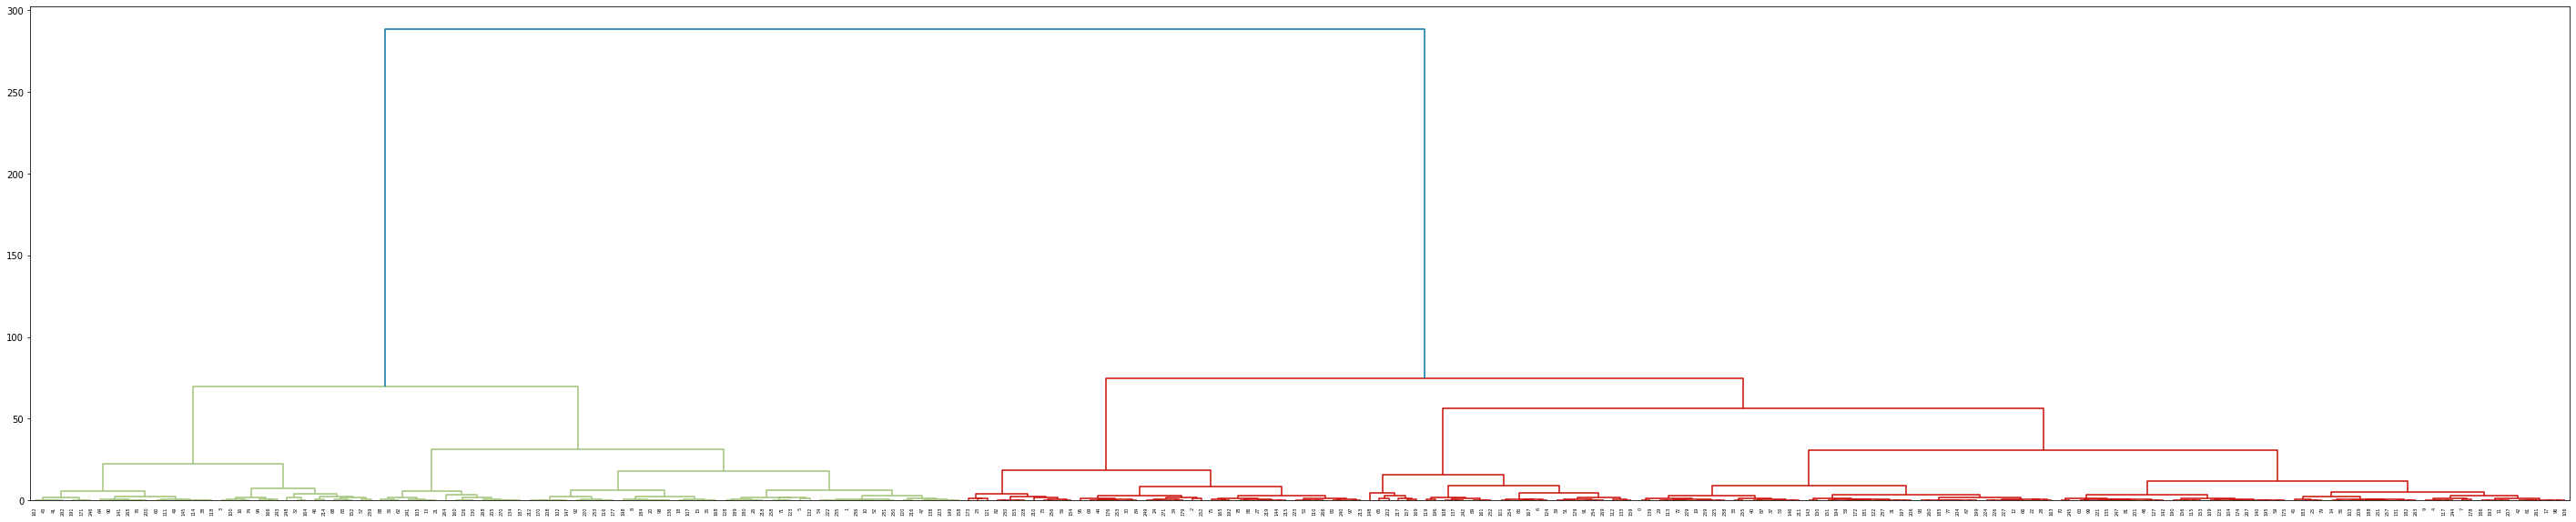

In [ ]:
plt.figure( figsize=(50, 10))
faithful_linkage = ward(faithful)
dendrogram( faithful_linkage)
plt.show()

커팅을 추가 해준다면?

In [ ]:
aggModel = AgglomerativeClustering( n_clusters=2, linkage='ward', affinity='euclidean').fit(faithful)
agg_labels = aggModel.fit_predict(faithful)

Text(0.5, 1.0, 'agglomerative')

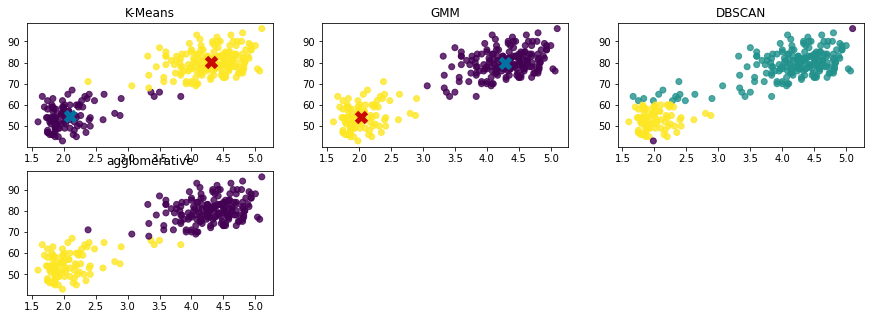

In [ ]:
plt.figure( figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.scatter( faithful.eruptions, faithful.waiting, c=kmeans.labels_, alpha=0.8)
plt.plot( kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('K-Means')

plt.subplot(2, 3, 2)
plt.scatter( faithful.eruptions, faithful.waiting, c=gm_labels, alpha=0.8)
plt.plot( gm.means_[0, 0], gm.means_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( gm.means_[1, 0], gm.means_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('GMM')

plt.subplot(2, 3, 3)
plt.scatter( faithful.eruptions, faithful.waiting, c=db_labels, alpha=0.8 )
plt.title('DBSCAN')

plt.subplot(2, 3, 4)
plt.scatter( faithful.eruptions, faithful.waiting, c=agg_labels, alpha=0.8 )
plt.title('agglomerative')

## HDBSCan
- 계층적 DBSCan
- 기존 DBSCAN + 계층적 군집화
- epsilon 설정 할 필요 없음 (파라미터 튜닝 비용 줄얻르 수 있음)

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 18.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 59.6 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2327722 sha256=fcdc5d7e5aa2a67d2fbb9ce4464a1e32fcec9934c8df989781e7f817f35e0264
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1

In [ ]:
from hdbscan import HDBSCAN

min_cluster_size만으로도 충분히 좋은 성능을 낼 수 있다.

In [ ]:
hdbModel = HDBSCAN( min_cluster_size=10 ).fit(faithful)
hdb_labels = hdbModel.fit_predict(faithful)

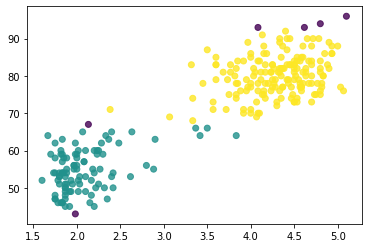

In [ ]:
plt.scatter( faithful.eruptions, faithful.waiting, c=hdb_labels, alpha=0.8 )

원하는 밀도만큼 DBSCAN을 수행하고, 나머지에 대해서 HDBSCAN을 수행

In [ ]:
hdbModel = HDBSCAN( min_cluster_size=20, cluster_selection_epsilon=0.5 ).fit(faithful)
hdb_labels = hdbModel.fit_predict(faithful)

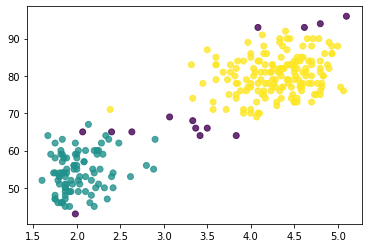

In [ ]:
plt.scatter( faithful.eruptions, faithful.waiting, c=hdb_labels, alpha=0.8 )

왜 계층적 구조?

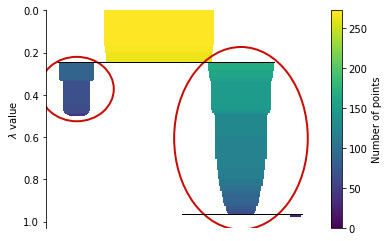

In [ ]:
hdbModel.condensed_tree_.plot(select_clusters=True)

## 클러스터링 비교

Text(0.5, 1.0, 'Original')

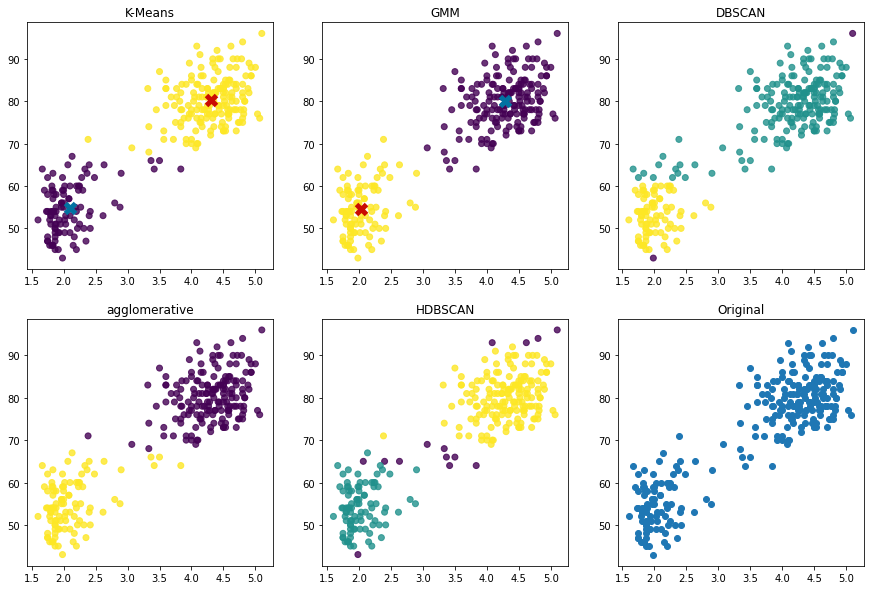

In [ ]:
plt.figure( figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter( faithful.eruptions, faithful.waiting, c=kmeans.labels_, alpha=0.8)
plt.plot( kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('K-Means')

plt.subplot(2, 3, 2)
plt.scatter( faithful.eruptions, faithful.waiting, c=gm_labels, alpha=0.8)
plt.plot( gm.means_[0, 0], gm.means_[0, 1], 'bx', markersize=10, markeredgewidth=5)
plt.plot( gm.means_[1, 0], gm.means_[1, 1], 'rx', markersize=10, markeredgewidth=5)
plt.title('GMM')

plt.subplot(2, 3, 3)
plt.scatter( faithful.eruptions, faithful.waiting, c=db_labels, alpha=0.8 )
plt.title('DBSCAN')

plt.subplot(2, 3, 4)
plt.scatter( faithful.eruptions, faithful.waiting, c=agg_labels, alpha=0.8 )
plt.title('agglomerative')

plt.subplot(2, 3, 5)
plt.scatter( faithful.eruptions, faithful.waiting, c=hdb_labels, alpha=0.8 )
plt.title('HDBSCAN')

plt.subplot(2, 3, 6)
plt.scatter( faithful.eruptions, faithful.waiting )
plt.title('Original')

# 실습


In [ ]:
iris = datasets.load_iris()
print(iris['feature_names'])
print(iris['target_names']) # 세 종류 붓꽃

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


- 꽃받침의 길이, 넓이, 꽃잎의 길이와 넓이
 - 3종류 붓꽃 파악
 - 붓꽃의 종류가 몇가지 있는 지 모른다는 전세


In [ ]:
x= iris.data
y=iris.target

실제 자료의 모양
- 4차원 자료 한번에 시각화
- 꽃받침과 꽃잎으로 나눠서 확인

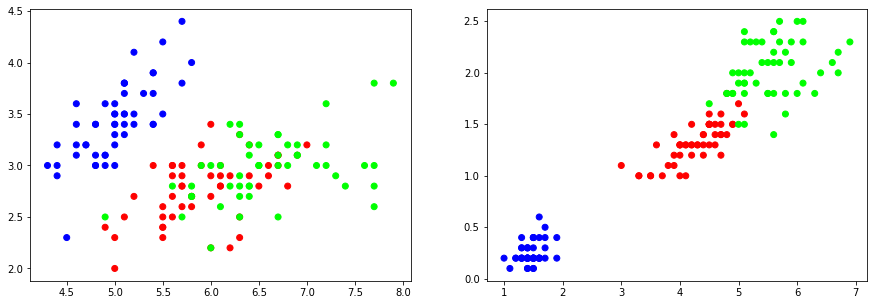

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y,cmap='brg')
plt.subplot(1,2,2)
plt.scatter(x[:,2],x[:,3],c=y,cmap='brg')

붓꽃의 종류가 얼마나 있는지 모른다 전제

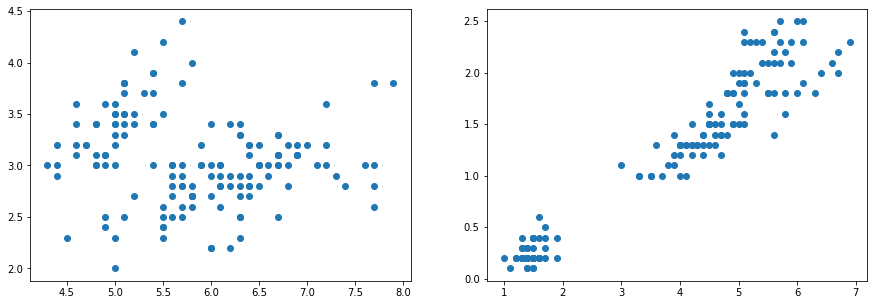

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1])
plt.subplot(1,2,2)
plt.scatter(x[:,2],x[:,3])

## 적당한 K는?

In [94]:
dist = []
for k in range(1, 11):
  model = KMeans(n_clusters=k).fit(faithful)
  dist.append( model.inertia_ )

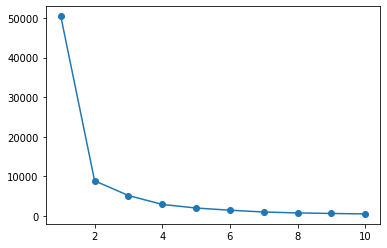

In [95]:
plt.plot(range(1,11),dist,'-o')

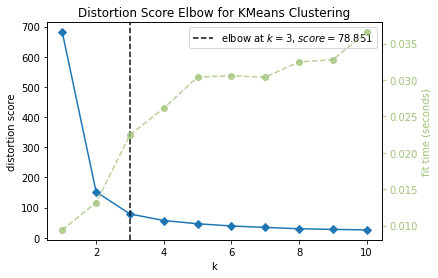

In [96]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11) )
visualizer.fit(x)
visualizer.poof()

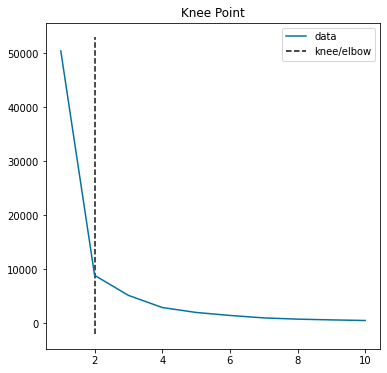

In [97]:
result = KneeLocator(x=range(1, 11), y=dist, curve='convex', direction='decreasing')
result.plot_knee()

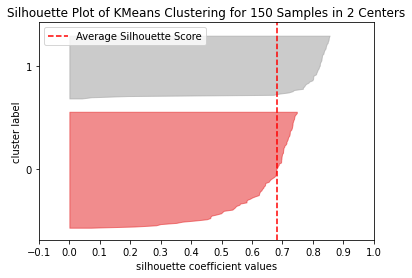

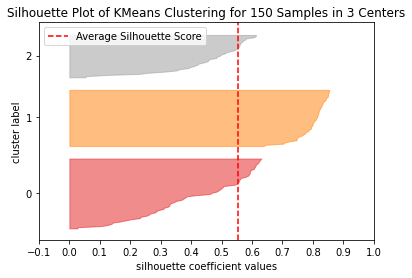

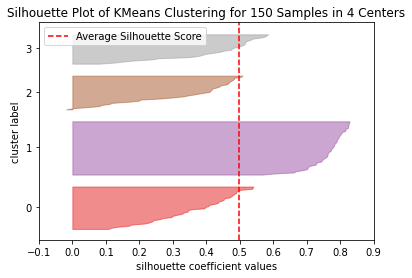

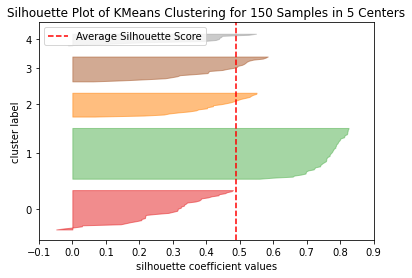

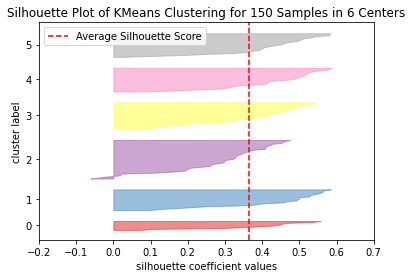

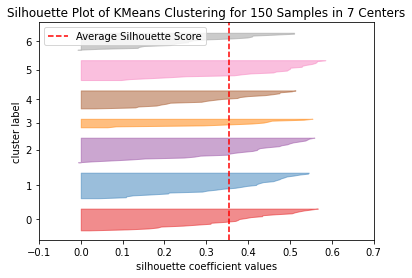

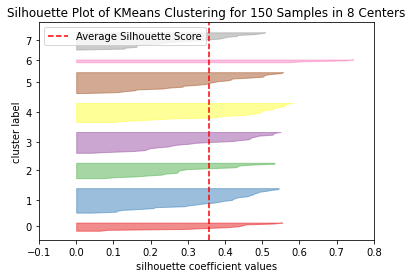

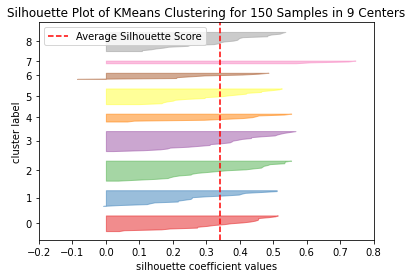

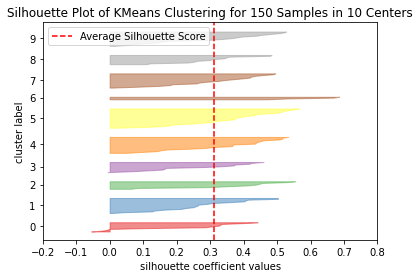

In [98]:
for k in range(2, 11):
  model = KMeans(n_clusters=k)
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(x)
  visualizer.poof()

- 적당한 K는 2나 3 정도 테스트 진행

## KMeans


In [105]:
kmeans = KMeans(n_clusters=3).fit(x)

Text(0.5, 1.0, 'petal kmeans')

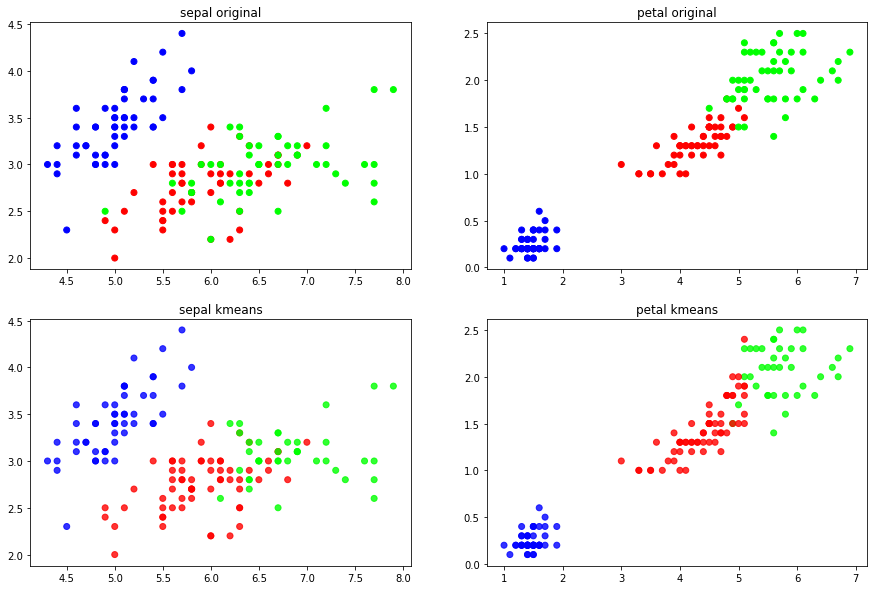

In [106]:
plt.figure( figsize=(15,10) )

plt.subplot(2, 2, 1)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='brg')
plt.title('sepal original')

plt.subplot(2, 2, 2)
plt.scatter( x[:, 2], x[:, 3], c=y, cmap='brg')
plt.title('petal original')

plt.subplot(2, 2, 3)
plt.scatter( x[:, 0], x[:, 1], c=kmeans.labels_, cmap='brg', alpha=0.8)
plt.title('sepal kmeans')

plt.subplot(2, 2, 4)
plt.scatter( x[:, 2], x[:, 3], c=kmeans.labels_, cmap='brg', alpha=0.8)
plt.title('petal kmeans')

## GMM

In [107]:
gm = GaussianMixture( n_components=3 ).fit(x)
gm_labels = gm.predict(x)

Text(0.5, 1.0, 'petal GMM')

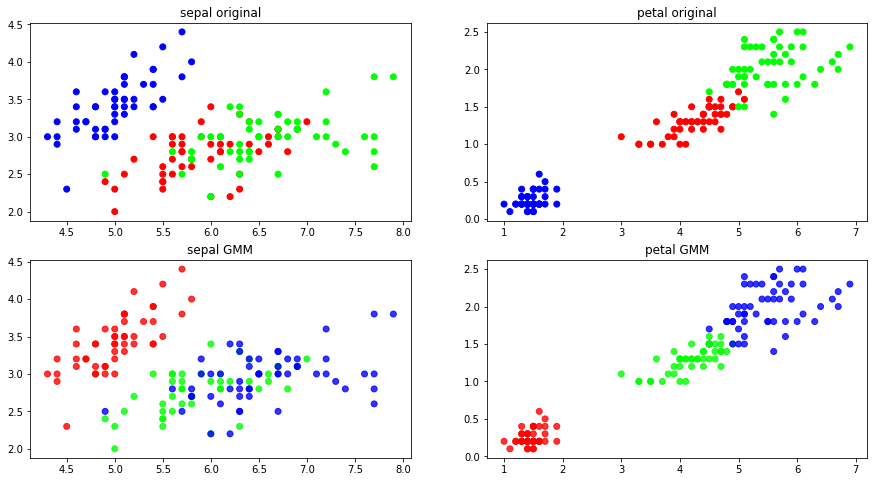

In [108]:
plt.figure( figsize=(15,8) )

plt.subplot(2, 2, 1)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='brg')
plt.title('sepal original')

plt.subplot(2, 2, 2)
plt.scatter( x[:, 2], x[:, 3], c=y, cmap='brg')
plt.title('petal original')

plt.subplot(2, 2, 3)
plt.scatter( x[:, 0], x[:, 1], c=gm_labels, cmap='brg', alpha=0.8)
plt.title('sepal GMM')

plt.subplot(2, 2, 4)
plt.scatter( x[:, 2], x[:, 3], c=gm_labels, cmap='brg', alpha=0.8)
plt.title('petal GMM')

가우시안이 좀 정확하게 판단하는 것으로 유명

## Agglomerative

In [109]:
aggModel = AgglomerativeClustering(linkage='ward', affinity='euclidean').fit(faithful)

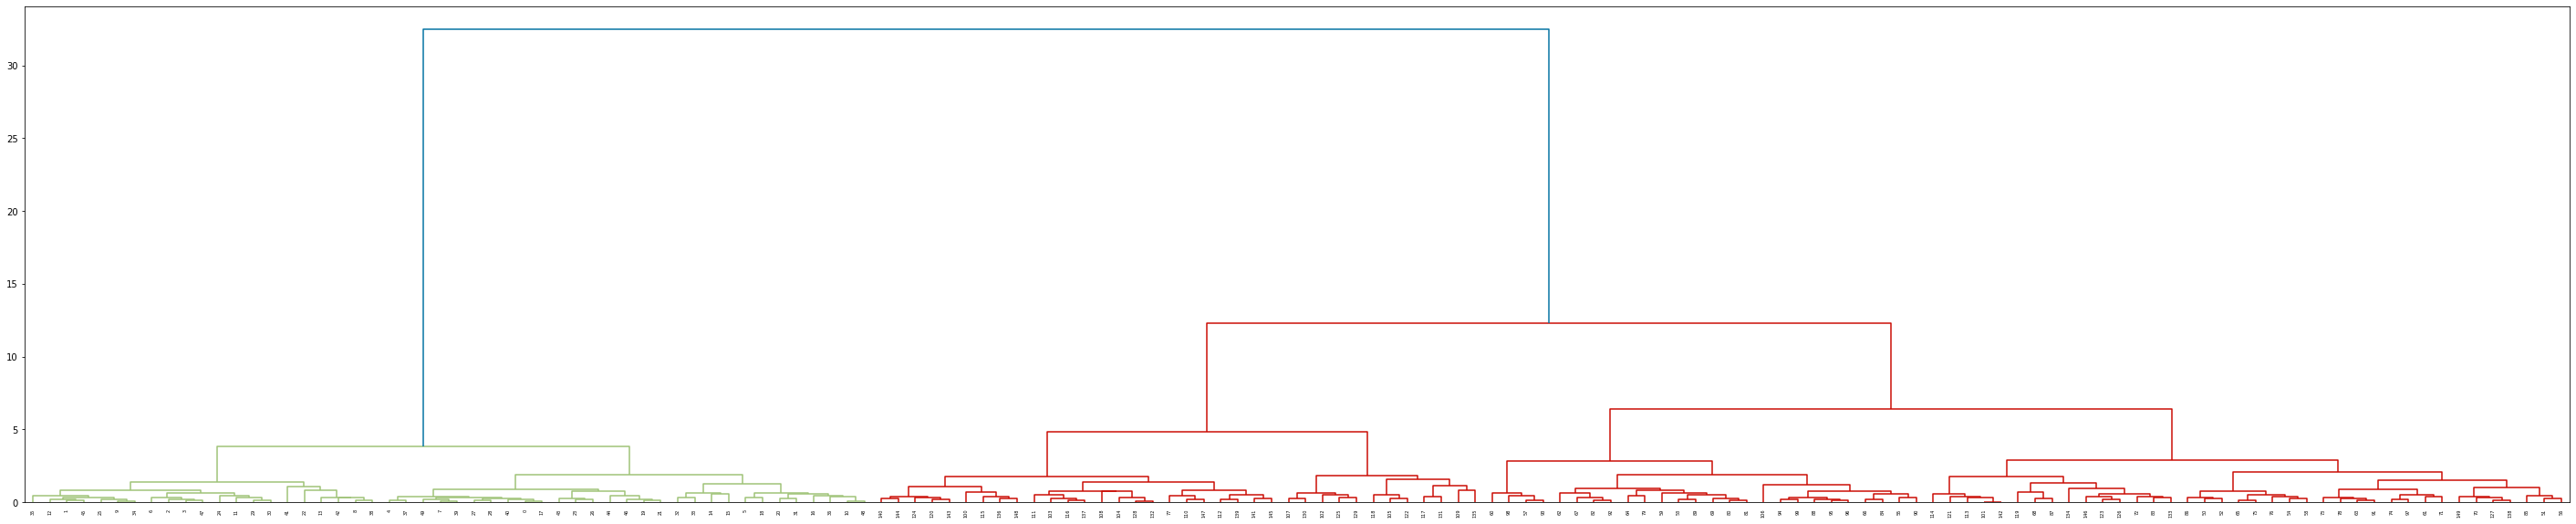

In [111]:
plt.figure( figsize=(50, 10))
x_linkage = ward(x)
dendrogram( x_linkage)
plt.show()

In [112]:
aggModel = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(x)

Text(0.5, 1.0, 'petal AGG')

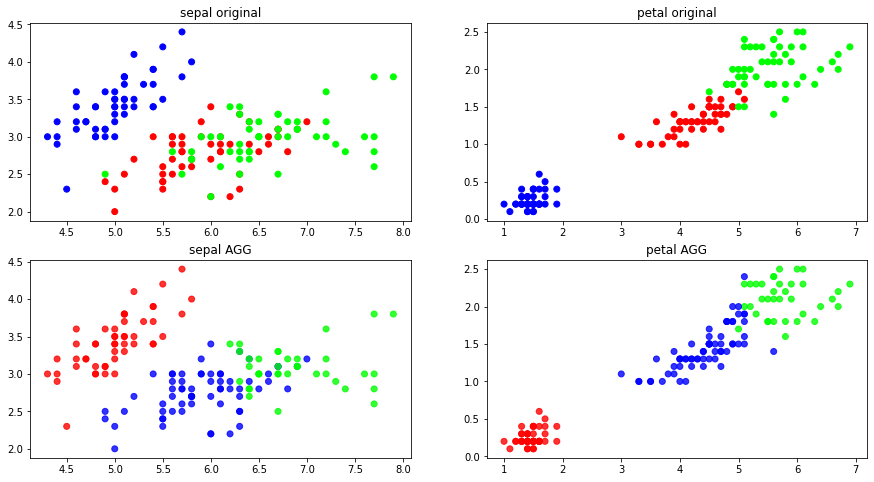

In [113]:
plt.figure( figsize=(15,8) )

plt.subplot(2, 2, 1)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='brg')
plt.title('sepal original') 

plt.subplot(2, 2, 2)
plt.scatter( x[:, 2], x[:, 3], c=y, cmap='brg')
plt.title('petal original')

plt.subplot(2, 2, 3)
plt.scatter( x[:, 0], x[:, 1], c=aggModel.labels_, cmap='brg', alpha=0.8)
plt.title('sepal AGG')

plt.subplot(2, 2, 4)
plt.scatter( x[:, 2], x[:, 3], c=aggModel.labels_, cmap='brg', alpha=0.8)
plt.title('petal AGG')

## DBSCAN 
- 잘 안씀
- 밀도 기반이라

In [121]:
dbscan = DBSCAN( eps=0.5, min_samples=10).fit(x)
db_labels = dbscan.fit_predict(x)

Text(0.5, 1.0, 'petal dbscan')

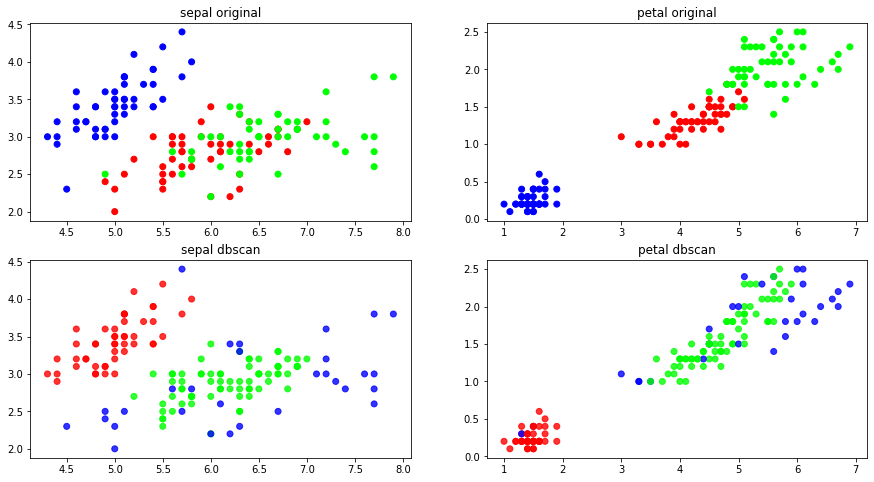

In [122]:
plt.figure( figsize=(15,8) )

plt.subplot(2, 2, 1)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='brg')
plt.title('sepal original') 

plt.subplot(2, 2, 2)
plt.scatter( x[:, 2], x[:, 3], c=y, cmap='brg')
plt.title('petal original')

plt.subplot(2, 2, 3)
plt.scatter( x[:, 0], x[:, 1], c=db_labels, cmap='brg', alpha=0.8)
plt.title('sepal dbscan')

plt.subplot(2, 2, 4)
plt.scatter( x[:, 2], x[:, 3], c=db_labels, cmap='brg', alpha=0.8)
plt.title('petal dbscan')

## HDBSCAN

In [137]:
hdbModel = HDBSCAN( min_cluster_size=5).fit(x)
hdb_labels = hdbModel.fit_predict(x)

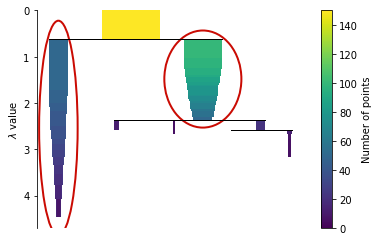

In [138]:
hdbModel.condensed_tree_.plot(select_clusters=True)

cluster가 어떤 사이즈여도 두개로 잡힘;;

Text(0.5, 1.0, 'petal hdbscan')

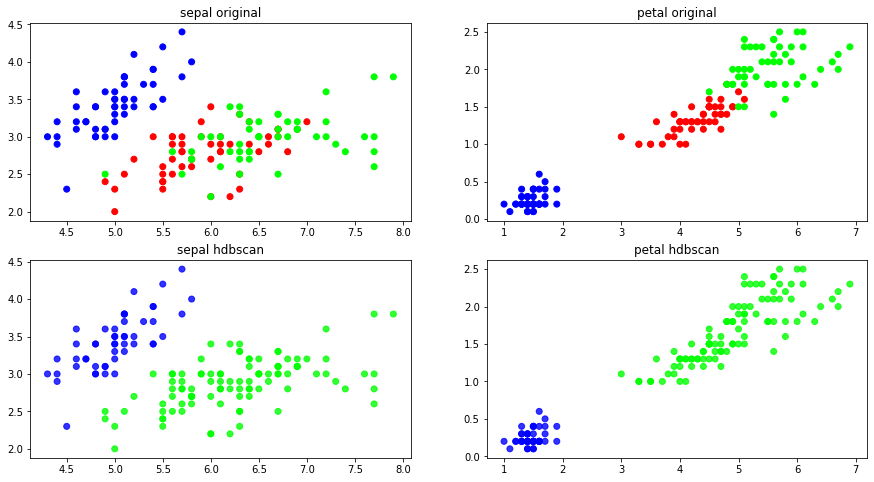

In [134]:
plt.figure( figsize=(15,8) )

plt.subplot(2, 2, 1)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='brg')
plt.title('sepal original') 

plt.subplot(2, 2, 2)
plt.scatter( x[:, 2], x[:, 3], c=y, cmap='brg')
plt.title('petal original')

plt.subplot(2, 2, 3)
plt.scatter( x[:, 0], x[:, 1], c=hdb_labels, cmap='brg', alpha=0.8)
plt.title('sepal hdbscan')

plt.subplot(2, 2, 4)
plt.scatter( x[:, 2], x[:, 3], c=hdb_labels, cmap='brg', alpha=0.8)
plt.title('petal hdbscan')

dbscan이랑 hdbscan 결합해보면?

In [144]:
hdbModel = HDBSCAN( min_cluster_size=3, cluster_selection_epsilon=0.9, min_samples=3).fit(x)
hdb_labels = hdbModel.fit_predict(x)

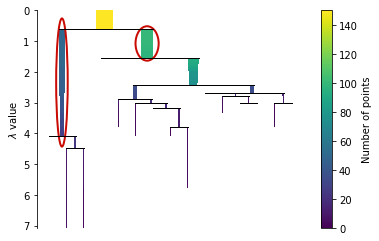

In [143]:
hdbModel.condensed_tree_.plot(select_clusters=True)

- 여전히 두개가 됨
- 아무래도 dbscan 계열은 이 예시와는 맞지 않음